# K-means Cluster

<br>

#### K-means 과정   

1. 임의의 위치에 구성하려는 군집화 개수만큼 **군집 중심점 생성**
2. 데이터는 가장 가까운 군집 중심점에 소속
3. 동일한 군집에 소속된 데이터들의 평균 계산 후 **군집 중심점 평균으로 이동**  
4. 다시 데이터를 가장 가까운 군집 중심점에 소속  
5. 군집 중심점 이동 후 데이터의 소속 변경이 없으면 군집화 종료  

<br>

#### K-means 장점  
- **대표적인 군집화 알고리즘**
- 쉽고 간결하다  

<br>

#### K-means 단점    
- **거리 기반 알고리즘**, 속성의 개수가 많을 경우 군집 정확도 감소  
- 반복 횟수가 많을 경우 군집 수행 시간 증가  
- 몇 개의 군집을 선택해야 할지 **초기 군집수 설정이 어려움**  

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [44]:
features, target = make_blobs(n_samples=500, n_features=2, 
                              centers=4, cluster_std=2, random_state=0)

print(features.shape, target.shape)

(500, 2) (500,)


In [45]:
df = pd.DataFrame(features, columns=['x1', 'x2'])
df['y'] = target

df.head()

,x1,x2,y
0,3.212311,1.596973,1
1,6.663101,-1.222368,1
2,1.067787,3.929420,0
3,-1.336095,5.866184,0
4,-0.557786,4.213925,1


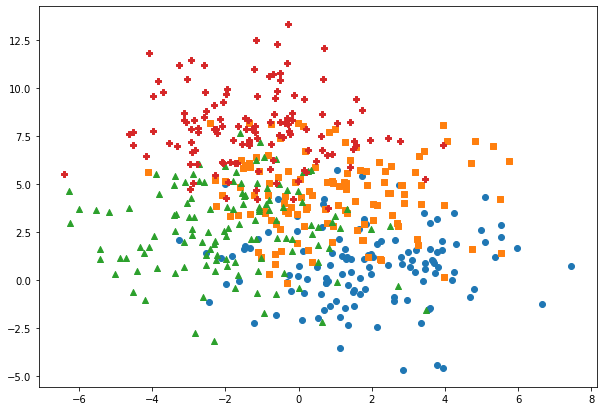

In [100]:
plt.figure(figsize=(10,7))
target_unique = df['y'].unique()
markers = ['o', 's', '^', 'P']

for mark, i in zip(markers, target_unique):
    cluster_target = df[df['y'] == i]
    plt.scatter(cluster_target['x1'], cluster_target['x2'],
                marker=mark)
    
plt.show()

In [115]:
kmeans = KMeans(n_clusters=4, random_state=0, max_iter=50)
kmeans.fit(features)
cluster_labels = kmeans.labels_

df['cluster_y'] = cluster_labels
df.head()

,x1,x2,y,cluster_y
0,3.212311,1.596973,1,2
1,6.663101,-1.222368,1,2
2,1.067787,3.929420,0,0
3,-1.336095,5.866184,0,1
4,-0.557786,4.213925,1,0


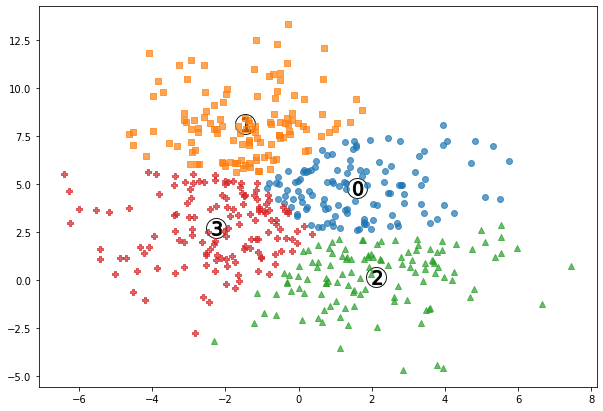

In [116]:
plt.figure(figsize=(10,7))
cluster_unique = df['cluster_y'].unique()
cluster_centers = kmeans.cluster_centers_
markers = ['o', 's', '^', 'P']

for mark, i, center in zip(markers, cluster_unique, cluster_centers):
    cluster_target = df[df['cluster_y'] == i]
    plt.scatter(x=center[0], y=center[1], s=400, color='white', 
                alpha=0.9, edgecolor='k')
    plt.scatter(x=center[0], y=center[1], s=200, color='k',
                edgecolor='k', marker='$%d$' %i)
    plt.scatter(cluster_target['x1'], cluster_target['x2'],
                marker=mark, alpha=0.7)
    
plt.show()

In [134]:
max_iters = [1, 10, 20, 100]

for i in max_iters:
    kmeans = KMeans(n_clusters=4, random_state=0, max_iter=i)
    kmeans.fit(features)
    cluster_centers = kmeans.cluster_centers_
    print('#### max_iters:{0} ####'.format(i))
    print(cluster_centers, '\n') 

#### max_iters:1 ####
[[ 2.22963197  0.71344323]
 [-1.11546317  7.56240707]
 [-2.77501994  1.58730813]
 [ 0.40776353  4.24775757]] 

#### max_iters:10 ####
[[ 2.17748728  0.21427155]
 [-1.54624064  7.92567807]
 [ 1.42986476  4.71255043]
 [-2.35762958  2.33113679]] 

#### max_iters:20 ####
[[ 1.59076307  4.7892158 ]
 [-1.47716224  8.09422384]
 [ 2.1129962   0.17916254]
 [-2.2441663   2.67825521]] 

#### max_iters:100 ####
[[ 1.59076307  4.7892158 ]
 [-1.45911309  8.1365717 ]
 [ 2.1129962   0.17916254]
 [-2.24917388  2.7193001 ]] 



## 군집 평가
- 대부분의 군집화 데이터 세트는 비교할 만한 타깃 레이블이 없다.  
- 비지도학습의 특성상 정확한 성능 평가가 어렵다.  
- 군집화 성능을 평가하는 대표적인 방법으로 실루엣 분석 활용  

<br>

#### 실루엣 분석  
- 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타낸다.   
- 군집간의 거리가 멀고, 동일 군집끼리 잘 뭉쳐 있을수록 좋은 군집화  

<br>

#### 사이킷런의 실루엣 계수  
- 전체 실루엣 계수의 평균값으로 0~1 사이의 값을 가지며, 1에 가까울수록 좋다.  
- 전체 실루엣 계수의 평균값이 높음과 동시에 개별 군집의 평균값의 편차가 크지 않아야 한다.  
- 특정 군집 실루엣 계수의 평균값만 높다면 좋은 군집화가 아니다.  

In [136]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [147]:
features_df = pd.DataFrame(features, columns=['x1', 'x2'])
n_cluster = [2, 3, 4, 5]

for i in n_cluster:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features)
    features_df['cluster_label'] = kmeans.labels_
    
    score_samples = silhouette_samples(features, features_df['cluster_label'])
    features_df['silhouette_coeff'] = score_samples
    
    mean_score = silhouette_score(features, features_df['cluster_label'])
    
    print('#### n_cluster:{0} ####'.format(i))
    print(features_df.groupby('cluster_label')['silhouette_coeff'].mean(), '\n')
    print('mean_score:{0:.4f}'.format(mean_score), '\n')

#### n_cluster:2 ####
cluster_label
0    0.410565
1    0.380810
Name: silhouette_coeff, dtype: float64 

mean_score:0.3953 

#### n_cluster:3 ####
cluster_label
0    0.350228
1    0.370824
2    0.343723
Name: silhouette_coeff, dtype: float64 

mean_score:0.3555 

#### n_cluster:4 ####
cluster_label
0    0.339188
1    0.424287
2    0.369660
3    0.309976
Name: silhouette_coeff, dtype: float64 

mean_score:0.3595 

#### n_cluster:5 ####
cluster_label
0    0.291435
1    0.332640
2    0.354008
3    0.344153
4    0.404936
Name: silhouette_coeff, dtype: float64 

mean_score:0.3435 



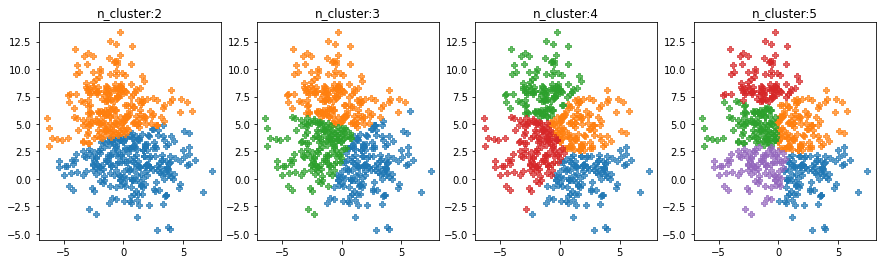

In [188]:
n_cluster = [2, 3, 4, 5]

fig, axs = plt.subplots(figsize=(15,4), ncols=4)

for ax,i in enumerate(n_cluster):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features)
    
    df['cluster_y'] = kmeans.labels_
    cluster_unique = df['cluster_y'].unique()
    
    axs[ax].set_title('n_cluster:{0}'.format(i))
    for i in cluster_unique:
        cluster_target = df[df['cluster_y'] == i]
        axs[ax].scatter(cluster_target['x1'], cluster_target['x2'],
                        marker=mark, alpha=0.7)
    
    
plt.show()

In [220]:
features, target = make_blobs(n_samples=500, n_features=2, 
                              centers=4, cluster_std=0.8, random_state=0)

df = pd.DataFrame(features, columns=['x1', 'x2'])
df['y'] = target

features_df = pd.DataFrame(features, columns=['x1', 'x2'])
n_cluster = [2, 3, 4, 5]

for i in n_cluster:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features)
    features_df['cluster_label'] = kmeans.labels_
    
    score_samples = silhouette_samples(features, features_df['cluster_label'])
    features_df['silhouette_coeff'] = score_samples
    
    mean_score = silhouette_score(features, features_df['cluster_label'])
    
    print('#### n_cluster:{0} ####'.format(i))
    print(features_df.groupby('cluster_label')['silhouette_coeff'].mean(), '\n')
    print('mean_score:{0:.4f}'.format(mean_score), '\n')

#### n_cluster:2 ####
cluster_label
0    0.720059
1    0.436606
Name: silhouette_coeff, dtype: float64 

mean_score:0.5126 

#### n_cluster:3 ####
cluster_label
0    0.707986
1    0.619391
2    0.380974
Name: silhouette_coeff, dtype: float64 

mean_score:0.5254 

#### n_cluster:4 ####
cluster_label
0    0.682654
1    0.537394
2    0.509955
3    0.601349
Name: silhouette_coeff, dtype: float64 

mean_score:0.5829 

#### n_cluster:5 ####
cluster_label
0    0.599221
1    0.674705
2    0.302376
3    0.448290
4    0.356498
Name: silhouette_coeff, dtype: float64 

mean_score:0.5104 



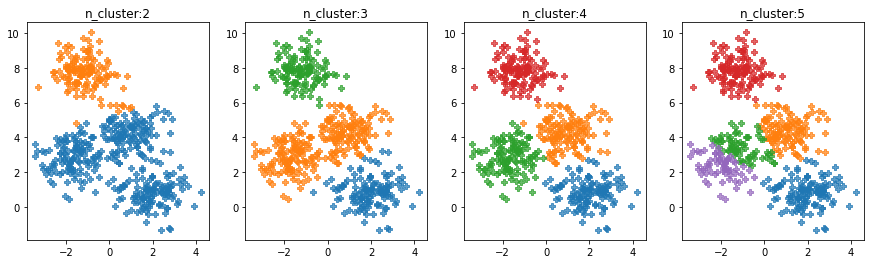

In [221]:
fig, axs = plt.subplots(figsize=(15,4), ncols=4)

for ax,i in enumerate(n_cluster):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features)
    
    df['cluster_y'] = kmeans.labels_
    cluster_unique = df['cluster_y'].unique()
    
    axs[ax].set_title('n_cluster:{0}'.format(i))
    for i in cluster_unique:
        cluster_target = df[df['cluster_y'] == i]
        axs[ax].scatter(cluster_target['x1'], cluster_target['x2'],
                        marker=mark, alpha=0.7)
    
    
plt.show()

### EM Clustering  

<br>

- 데이터가 여러 개의 **가우시안 분포(정규분포)**를 가진 데이터 집합들이 섞여서 생성된  
것이라는 가정하에 군집화를 수행하는 방식    
- k-means clustering은 같은 크기의 클러스터를 만드는 것을 선호하여  
군집화 결과가 좋지 못하다, **가우시안 혼합모델을 사용한 EM clustering은  
분산값을 조정하며 군집화를 시행하기 때문에** 좋은 군집 결과를 보여준다.

<br>

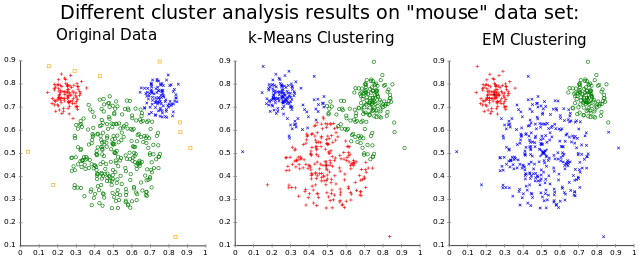





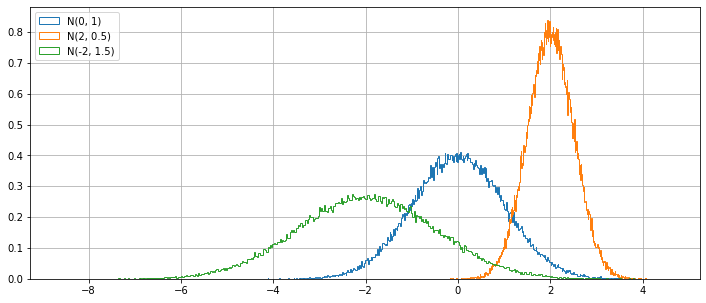

In [269]:
a = np.random.randn(100000)
b = 0.5 * np.random.randn(100000) +2
c = 1.5 * np.random.randn(100000) -2

plt.figure(figsize=(12,5))
plt.hist(a, bins=500, density=True, histtype='step', label='N(0, 1)')
plt.hist(b, bins=500, density=True, histtype='step', label='N(2, 0.5)')
plt.hist(c, bins=500, density=True, histtype='step', label='N(-2, 1.5)')
plt.legend()
plt.grid()
plt.show()

# GMM (Gaussian Mixture Model) Cluster

<br>

- 거리기반인 k-means cluster의 단점 보완
- 유연한 군집화 수행
- 시간이 오래 걸리는 단점
- 군집의 중심 좌표를 구할 수 없다

In [311]:
features, target = make_blobs(n_samples=500, n_features=2, centers=3, 
                              cluster_std=0.5, random_state=0)

transform = [[0.5, -0.5], [-0.5, 0.9]]
features_dot = np.dot(features, transform)

df = pd.DataFrame(features_dot, columns=['x1', 'x2'])
df['y'] = target
df.head()

,x1,x2,y
0,-1.732528,3.534441,0
1,-2.504971,3.816997,2
2,-2.086303,3.043079,2
3,-1.099487,2.497610,0
4,-2.195023,3.954294,0


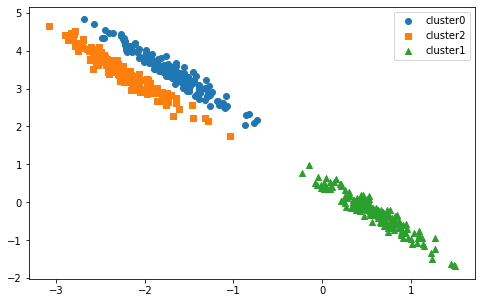

In [316]:
plt.figure(figsize=(8,5))
target_unique = df['y'].unique()
markers = ['o', 's', '^', 'P']

for mark, i in zip(markers, target_unique):
    cluster_target = df[df['y'] == i]
    plt.scatter(cluster_target['x1'], cluster_target['x2'],
                marker=mark, label='cluster'+str(i))
plt.legend()    
plt.show()

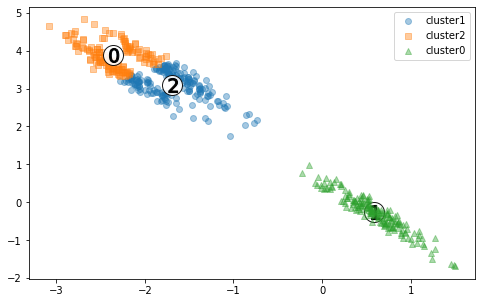

In [322]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(features_dot)
df['cluster_y'] = kmeans.labels_

plt.figure(figsize=(8,5))
cluster_unique = df['cluster_y'].unique()
cluster_centers = kmeans.cluster_centers_
markers = ['o', 's', '^', 'P']

for mark, i, center in zip(markers, cluster_unique, cluster_centers):
    cluster_target = df[df['cluster_y'] == i]
    plt.scatter(cluster_target['x1'], cluster_target['x2'],
                marker=mark, alpha=0.4, label='cluster'+str(i))
    plt.scatter(x=center[0], y=center[1], s=400, color='white', 
                alpha=0.9, edgecolor='k')
    plt.scatter(x=center[0], y=center[1], s=200, color='k',
                edgecolor='k', marker='$%d$' %i)
plt.legend()    
plt.show()

In [323]:
from sklearn.mixture import GaussianMixture

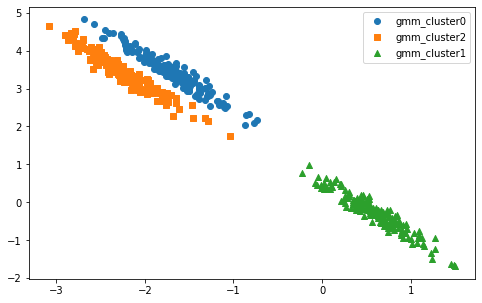

In [330]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(features_dot)
df['gmm_cluster_y'] = gmm.predict(features_dot)

plt.figure(figsize=(8,5))
cluster_unique = df['gmm_cluster_y'].unique()
markers = ['o', 's', '^', 'P']

for mark, i in zip(markers, cluster_unique):
    cluster_target = df[df['gmm_cluster_y'] == i]
    plt.scatter(cluster_target['x1'], cluster_target['x2'],
                marker=mark, alpha=1, label='gmm_cluster'+str(i))
plt.legend()    
plt.show()